# Item-based Collaborative Filtering Product Recommendation System

In [1]:
#import library to be used in the project
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#Read the file and print the first 5 row
product_ratings = pd.read_csv(r'C:\Users\Wilson Tan\Downloads\AI assignment\product.csv', names=['userId', 'productId','Rating','timestamp'])
product_ratings.head()

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


## Data cleansing

In [33]:
#Shape of the data
product_ratings.shape

(7824482, 4)

In [2]:
#Extract 110000 data from the dataset(7824482)
product_ratings = product_ratings.iloc[:110000,0:]

In [35]:
#Shape of the data
product_ratings.shape

(110000, 4)

In [3]:
product_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     110000 non-null  object 
 1   productId  110000 non-null  object 
 2   Rating     110000 non-null  float64
 3   timestamp  110000 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 3.4+ MB


In [36]:
#Check the datatypes
product_ratings.dtypes

userId        object
productId     object
Rating       float64
timestamp      int64
dtype: object

In [37]:
#Check for missing values
print('Number of missing values across columns:')
print(product_ratings.isnull().sum())

Number of missing values across columns:
userId       0
productId    0
Rating       0
timestamp    0
dtype: int64


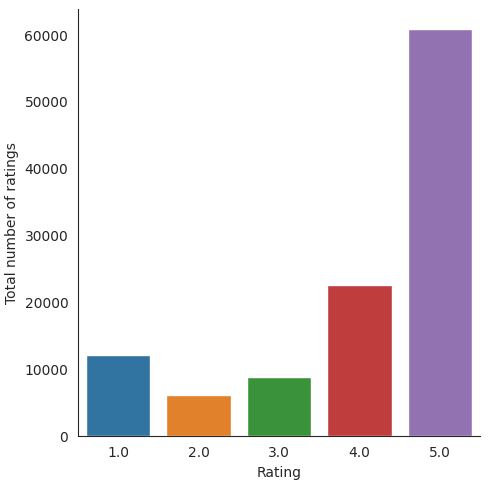

In [38]:
# Check with the ratings distribution
with sns.axes_style('white'):
    g = sns.catplot(x ="Rating", data = product_ratings, kind ='count')
    g.set_ylabels("Total number of ratings")

In [39]:
#Print the number of ratings, user and product
print("Total number of ratings  :",product_ratings.shape[0])
print("Total number of user     :", len(np.unique(product_ratings.userId)))
print("Total number of products :", len(np.unique(product_ratings.productId)))

Total number of ratings  : 110000
Total number of user     : 98471
Total number of products : 7442


In [40]:
#Summarize data to userID and productID with Pivot Table
user_product_matrix = pd.pivot_table(product_ratings, index='userId', columns='productId', values ='Rating').fillna(0)
user_product_matrix

productId,0132793040,0321732944,0439886341,0511189877,0528881469,0558835155,059400232X,0594012015,0594017343,0594017580,...,B00005NIM7,B00005NIM8,B00005NIM9,B00005NIMD,B00005NIME,B00005NIMF,B00005NIMG,B00005NIMH,B00005NIMI,B00005NIMJ
userId,,,,,,,,,,,,,,,,,,,,,
A001944026UMZ8T3K5QH1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A00766851QZZUBOVF4JFT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A00995931BE16NG4F52QC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A01255851ZO1U93P8RKGE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A014623426J5CM7M12MBW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZZREGNDJCXP8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZZSCU0QYNQQ6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZZST8OYL5P4Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
user_product_matrix.shape

(98471, 7442)

In [42]:
#Sort the product with the highest number of rating
total_rate_of_a_product = product_ratings.groupby(by='productId')['Rating'].count().sort_values(ascending=False)
total_rate_of_a_product.head()

productId
B00004ZCJE    2547
B00001P4ZH    2075
B00004T8R2    1692
B00001WRSJ    1586
B00005N6KG    1296
Name: Rating, dtype: int64

## Start filtering

In [43]:
#One item is selected
users_ratings = user_product_matrix['B00004ZCJE']
users_ratings.head(10)

userId
A001944026UMZ8T3K5QH1    0.0
A00766851QZZUBOVF4JFT    0.0
A00995931BE16NG4F52QC    0.0
A01255851ZO1U93P8RKGE    0.0
A014623426J5CM7M12MBW    0.0
A01580702BRW77PSJ9X34    0.0
A01852072Z7B68UHLI5UG    0.0
A02459613IS599WTHNWWS    0.0
A0266076X6KPZ6CCHGVS     0.0
A0293130VTX2ZXA70JQS     0.0
Name: B00004ZCJE, dtype: float64

In [44]:
#Calculate the correlation
similar_product = user_product_matrix.corrwith(users_ratings)
similar_product

productId
0132793040   -0.000494
0321732944   -0.000494
0439886341   -0.000745
0511189877   -0.001175
0528881469   -0.002224
                ...   
B00005NIMF   -0.000494
B00005NIMG   -0.001173
B00005NIMH   -0.002719
B00005NIMI   -0.000666
B00005NIMJ   -0.008118
Length: 7442, dtype: float64

In [45]:
# Create a dataframe
similar_product = pd.DataFrame(similar_product, columns = ['Correlation'])
similar_product.head(10)

,Correlation
productId,
0132793040,-0.000494
0321732944,-0.000494
0439886341,-0.000745
0511189877,-0.001175
0528881469,-0.002224
0558835155,-0.000494
059400232X,-0.000856
0594012015,-0.001057
0594017343,-0.000494


In [46]:
#Sort the product with correlation descendingly
similar_product.sort_values(by = 'Correlation', ascending = False).head(10)

,Correlation
productId,
B00004ZCJE,1.000000
B00004ZC8Y,0.067051
B00000K0KJ,0.022682
B0000296HI,0.022682
B000031WDA,0.022682
B00004TVS0,0.022682
B00000J1UU,0.022682
B00000JFOF,0.022682
B00004TS3Y,0.022682


In [47]:
df_rating = pd.DataFrame(product_ratings.groupby('productId')['Rating'].count())

In [48]:
recommend_product = similar_product.join(df_rating['Rating']).sort_values(by = 'Correlation', ascending = False)
recommend_product

,Correlation,Rating
productId,,
B00004ZCJE,1.000000,2547
B00004ZC8Y,0.067051,720
B00000K0KJ,0.022682,1
B0000296HI,0.022682,1
B000031WDA,0.022682,1
...,...,...
0972683275,-0.015484,1051
B00005N6KG,-0.016936,1296
B00004T8R2,-0.018368,1692


In [49]:
# Recommend product that has more than 50 ratings to increase the accuracy 
recommend_product_2 = recommend_product[recommend_product['Rating'] > 50].sort_values(by = 'Correlation', ascending = False)
recommend_product_2.head(20)

,Correlation,Rating
productId,,
B00004ZCJE,1.000000,2547
B00004ZC8Y,0.067051,720
B00005LEN4,0.017118,1107
B00004ZCAT,0.011006,88
B00005K47X,0.009546,465
B00004ZCB4,0.009507,76
B00004ZCA5,0.009215,52
B00004ZCKV,0.007048,303
B00004WCFY,0.006491,64
